In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# First combined all the csv file into one 
# Then load that single csv file

In [4]:
df = pd.read_csv('Desktop/combined_gtd.csv', low_memory = False)

In [129]:
import pandas as pd

# Step 1: Load the combined file
file_path = '/Users/mohitksingh/Desktop/combined_gtd.csv'
df = pd.read_csv(file_path, low_memory=False)

# Step 2: Identify object-type columns (likely to contain mixed types)
mixed_type_cols = df.select_dtypes(include='object').columns
print("Object-type columns (possibly mixed types):")
print(mixed_type_cols)

Object-type columns (possibly mixed types):
Index(['approxdate', 'resolution', 'country_txt', 'region_txt', 'provstate',
       'city', 'location', 'summary', 'alternative_txt', 'attacktype1_txt',
       'attacktype2_txt', 'attacktype3_txt', 'targtype1_txt',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1_txt', 'targtype2_txt',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2_txt', 'targtype3_txt',
       'targsubtype3_txt', 'corp3', 'target3', 'natlty3_txt', 'gname',
       'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive',
       'claimmode_txt', 'claimmode2_txt', 'claimmode3_txt', 'weaptype1_txt',
       'weapsubtype1_txt', 'weaptype2_txt', 'weapsubtype2_txt',
       'weaptype3_txt', 'weapsubtype3_txt', 'weaptype4_txt',
       'weapsubtype4_txt', 'weapdetail', 'propextent_txt', 'propcomment',
       'divert', 'kidhijcountry', 'ransomnote', 'hostkidoutcome_txt',
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'related'],
      dtype='objec

In [7]:
import pandas as pd
file_path = '/Users/mohitksingh/Desktop/combined_gtd.csv'
df = pd.read_csv(file_path, low_memory = False)
print(df.head())

        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       0     0        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY 

#top 5 Rows 

In [9]:
print(df.shape)

(157520, 137)


#Checking the Number of Rows and Columns.

In [10]:
print(df.columns.tolist())

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'ingroup', 'ingroup2', 'ingroup3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2',

#All columns name 

In [26]:
df.isnull().sum().sum()

np.int64(254699)

#checking the null values and concluded that 254699 total null values are available.

In [14]:
# Drop columns with more than 80% missing values
threshold = 0.8
missing_ratio = df.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > threshold].index

print("Dropping columns:\n", cols_to_drop.tolist())

df = df.drop(columns=cols_to_drop)

Dropping columns:
 ['approxdate', 'resolution', 'alternative', 'attacktype2', 'attacktype3', 'targtype2', 'targsubtype2', 'corp2', 'target2', 'natlty2', 'targtype3', 'targsubtype3', 'corp3', 'target3', 'natlty3', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'ingroup2', 'ingroup3', 'gsubname3', 'guncertain2', 'guncertain3', 'claimmode', 'claim2', 'claimmode2', 'claim3', 'claimmode3', 'compclaim', 'weaptype2', 'weapsubtype2', 'weaptype3', 'weapsubtype3', 'weaptype4', 'weapsubtype4', 'propvalue', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus', 'ransomnote', 'hostkidoutcome', 'nreleased', 'addnotes', 'related']


#Dropped the columns which have more than 80% Null values because they will not give insightful meaning to the dataset.

In [19]:
columns_to_keep = [
    'iyear', 'imonth', 'iday',
    'region_txt', 'country_txt', 'provstate', 'city',
    'attacktype1_txt', 'targtype1_txt', 'target1',
    'gname', 'motive',
    'nkill', 'nwound',
    'nkillus', 'nwoundus',
    'property', 'propextent_txt'
]
df = df[columns_to_keep]  # Keep only relevant columns

#columns which keep value to give insights.

In [29]:
print(df.shape)

(157520, 18)


In [27]:
df = df.copy()

# Fill key nulls
df['nkill'] = df['nkill'].fillna(0)
df['nwound'] = df['nwound'].fillna(0)
df['city'] = df['city'].fillna('Unknown')
df['motive'] = df['motive'].fillna('Unknown')


In [30]:
df.isnull().sum().sort_values(ascending=False).head(10)

nwoundus     64767
nkillus      64493
provstate    14520
target1        652
property        84
gname            0
nwound           0
nkill            0
motive           0
iyear            0
dtype: int64

#nwoundus, nkillus, provstate, target1 and property have Null values.

In [32]:
df['nwoundus'] = df['nwoundus'].fillna(0)
df['nkillus'] = df['nkill'].fillna(0)

In [35]:
df['provstate'] = df['provstate'].fillna('Unknown')
df['target1'] = df['target1'].fillna('Unknown')

In [38]:
df['property'] = df['property'].fillna(0)

In [39]:
df.isnull().sum().sum()

np.int64(0)

#Null values has been updated completly.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157520 entries, 0 to 157519
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            157520 non-null  int64  
 1   imonth           157520 non-null  int64  
 2   iday             157520 non-null  int64  
 3   region_txt       157520 non-null  object 
 4   country_txt      157520 non-null  object 
 5   provstate        157520 non-null  object 
 6   city             157520 non-null  object 
 7   attacktype1_txt  157520 non-null  object 
 8   targtype1_txt    157520 non-null  object 
 9   target1          157520 non-null  object 
 10  gname            157520 non-null  object 
 11  motive           157520 non-null  object 
 12  nkill            157520 non-null  float64
 13  nwound           157520 non-null  float64
 14  nkillus          157520 non-null  float64
 15  nwoundus         157520 non-null  float64
 16  property         157520 non-null  floa

In [42]:
df.head()

,iyear,imonth,iday,region_txt,country_txt,provstate,city,attacktype1_txt,targtype1_txt,target1,gname,motive,nkill,nwound,nkillus,nwoundus,property,propextent_txt
0,1970,0,0,Central America & Caribbean,Dominican Republic,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Julio Guzman,MANO-D,Unknown,1.0,0.0,0.0,0.0,0.0,.
1,1970,0,0,North America,Mexico,Unknown,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",23rd of September Communist League,Unknown,0.0,0.0,0.0,0.0,0.0,.
2,1970,1,0,Southeast Asia,Philippines,Tarlac,Unknown,Assassination,Journalists & Media,Employee,Unknown,Unknown,1.0,0.0,0.0,0.0,0.0,.
3,1970,1,0,Western Europe,Greece,Attica,Athens,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,Unknown,Unknown,0.0,0.0,0.0,0.0,1.0,.
4,1970,1,0,East Asia,Japan,Unknown,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,Unknown,Unknown,0.0,0.0,0.0,0.0,1.0,.


In [43]:
Total_attacks = len(df)
print(f"Total number of Terrorist Attacks: {Total_attacks}")

Total number of Terrorist Attacks: 157520
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [44]:
df.describe()

,iyear,imonth,iday,nkill,nwound,nkillus,nwoundus,property
count,157520.000000,157520.000000,157520.000000,157520.000000,157520.000000,157520.000000,157520.000000,157520.000000
mean,2000.438592,6.485894,15.453041,2.231004,2.832256,0.033170,0.027298,-0.429564
std,12.961724,3.392466,8.815194,11.352675,21.836997,4.893325,2.637976,3.025631
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,1989.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2005.000000,6.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2013.000000,9.000000,23.000000,2.000000,1.000000,0.000000,0.000000,1.000000
max,2015.000000,12.000000,31.000000,1500.000000,5500.000000,1357.500000,751.000000,1.000000


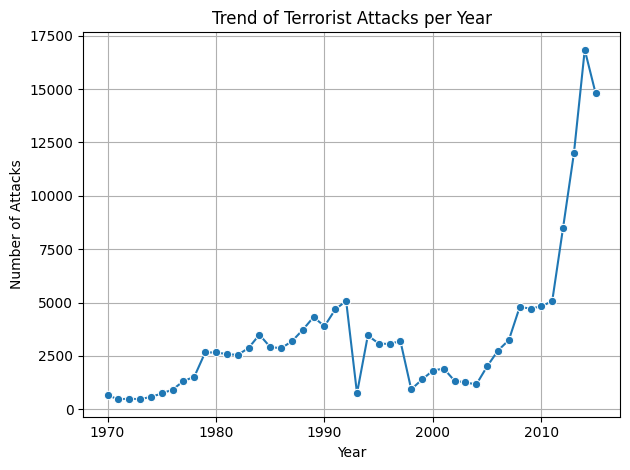

In [98]:
attacks_per_year = df['iyear'].value_counts().sort_index()
sns.lineplot(x = attacks_per_year.index, y = attacks_per_year.values, marker = 'o')
plt.title("Trend of Terrorist Attacks per Year")
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.tight_layout()
plt.show()

#Above chart shows the Trend of terrorist Attacks per year. We can conclude that after 2010, terror Attacks increases rapidly.

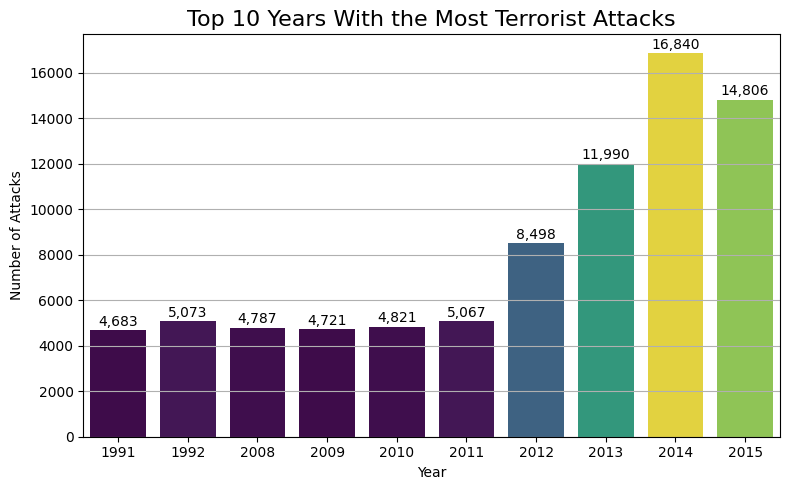

In [100]:
plt.figure(figsize=(8, 5))
year_counts = df['iyear'].value_counts().head(10).sort_index()
year_df = year_counts.reset_index()
year_df.columns = ['Year', 'Attacks']
ax = sns.barplot(data=year_df, x='Year', y='Attacks', hue = 'Attacks', palette='viridis', legend = False)

for i, value in enumerate(year_df['Attacks']):
    ax.text(i, value + 200, f'{int(value):,}', ha='center', fontsize=10)

plt.title("Top 10 Years With the Most Terrorist Attacks", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#from the above chart, we can say that 2014 was the most terror attacked year of all.

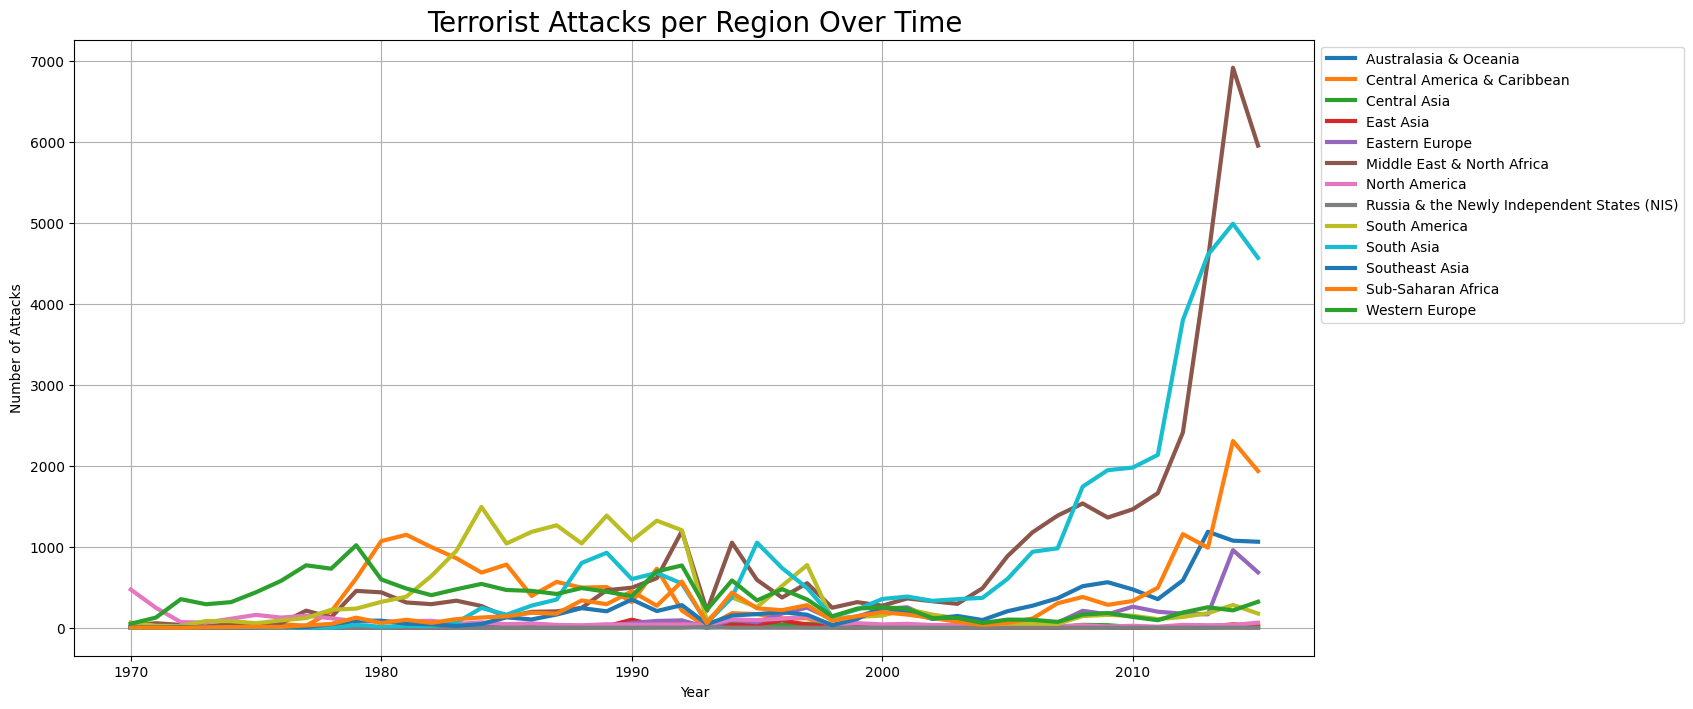

In [102]:
region_yearly = df.groupby(['iyear', 'region_txt']).size().unstack().fillna(0)
region_yearly.plot(figsize=(16, 8), linewidth = 3)
plt.title("Terrorist Attacks per Region Over Time", fontsize = 20)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#Above chart shows Middle East & North Africa has rapid increase in terror attacks, south Asia on second and Sub saharan Africa on third. 

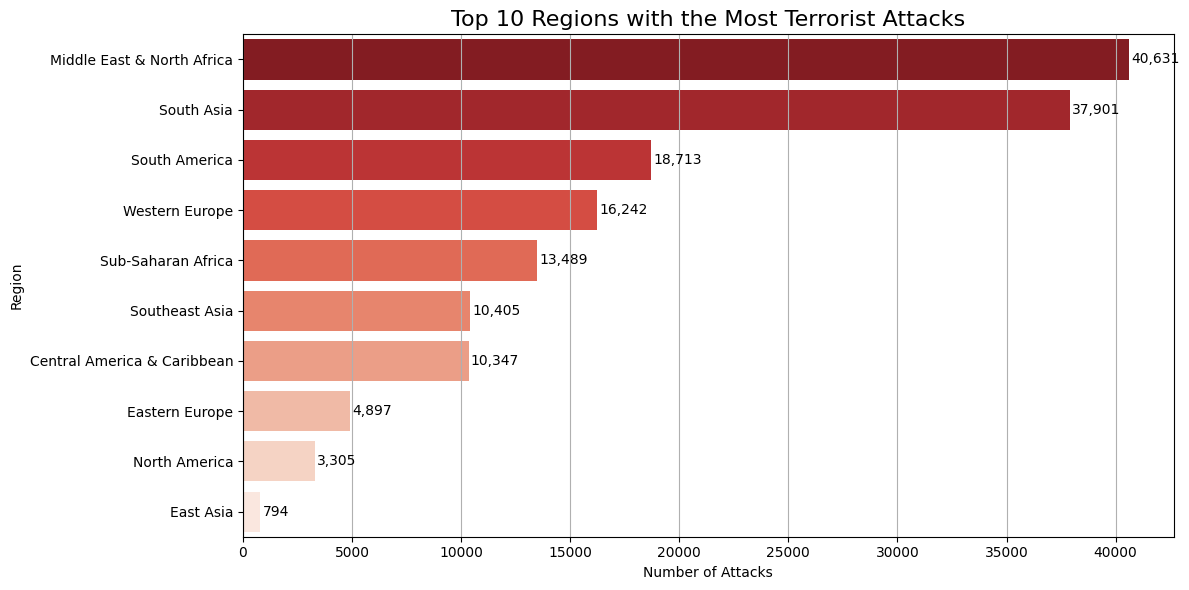

In [62]:
# Calculate total attacks per region
attacks_by_region = df['region_txt'].value_counts().head(10)
# Convert to DataFrame to use hue properly
region_df = attacks_by_region.reset_index()
region_df.columns = ['Region', 'Attacks']


# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=region_df,
    x='Attacks',
    y='Region',
    hue='Region',
    palette='Reds_r',
    legend=False
)
# Add exact values to bars
for i, value in enumerate(attacks_by_region.values):
    ax.text(value + 100, i, f'{int(value):,}', va='center', fontsize=10)

plt.title("Top 10 Regions with the Most Terrorist Attacks", fontsize=16)
plt.xlabel("Number of Attacks")
plt.ylabel("Region")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

#concluded that Middle East & north Africa and South Asia has far more Terror attacks than other region.

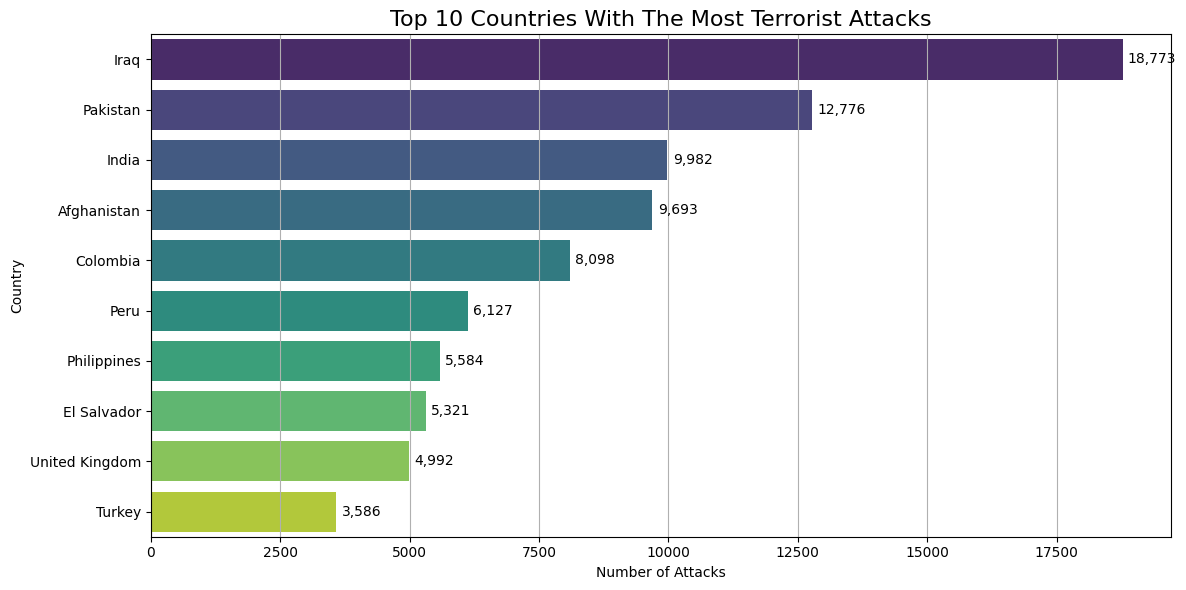

In [118]:
# Calculate total attacks per country
attacks_by_country = df['country_txt'].value_counts().head(10)

country_df = attacks_by_country.reset_index()
country_df.columns = ['Country', 'Attacks']
plt.figure(figsize=(12, 6))
ax = sns.barplot(data = country_df, x = 'Attacks', y = 'Country', hue = 'Country', palette = 'viridis', legend = False)
for i, value in enumerate(attacks_by_country.values):
    ax.text(value + 100, i, f'{int(value):,}', va = 'center', fontsize = 10)

plt.title("Top 10 Countries With The Most Terrorist Attacks", fontsize = 16)
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
plt.grid(axis = 'x')
plt.tight_layout()
plt.show()

#Iraq, Pakistan and India are the top 3 countries in facing most terror attacks.

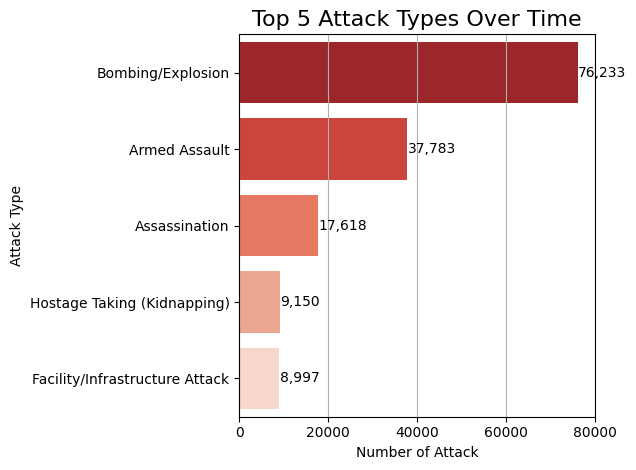

In [95]:
attack_type_yearly = df['attacktype1_txt'].value_counts().head(5)
attack_type_df = attack_type_yearly.reset_index()
attack_type_df.columns = ['Attack type', 'Year']
ax = sns.barplot(data = attack_type_df, x = 'Year', y = 'Attack type', hue = 'Attack type', palette = 'Reds_r', legend = False)
for i, value in enumerate(attack_type_yearly.values):
    ax.text(value + 100, i, f'{int(value):,}', va = 'center', fontsize = 10)
plt.title("Top 5 Attack Types Over Time", fontsize = 16)
plt.xlabel('Number of Attack')
plt.ylabel('Attack Type')
plt.grid(axis = 'x')
plt.tight_layout()
plt.show()

#Bombing/Explosion is the most common attack type to be used in attacks.

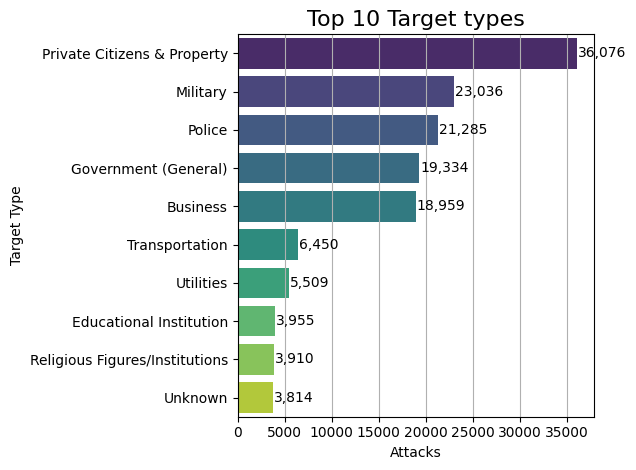

In [121]:
# top 10 target types
Target_type = df['targtype1_txt'].value_counts().head(10)
Target_df = Target_type.reset_index()
Target_df.columns = ['Target type', 'Attacks']
ax = sns.barplot(data = Target_df, x='Attacks', y='Target type', hue = 'Target type', palette = 'viridis', legend = False)

for i, value in enumerate(Target_type.values):
    ax.text(value + 100, i, f'{int(value):,}', va = 'center', fontsize = 10)

plt.title("Top 10 Target types", fontsize = 16)
plt.xlabel('Attacks')
plt.ylabel('Target Type')
plt.grid(axis = 'x')
plt.tight_layout()
plt.show()

#Private Citizens & Property or Government is frequently targeted, it indicates an intent to spread fear among civilians or undermine state control.

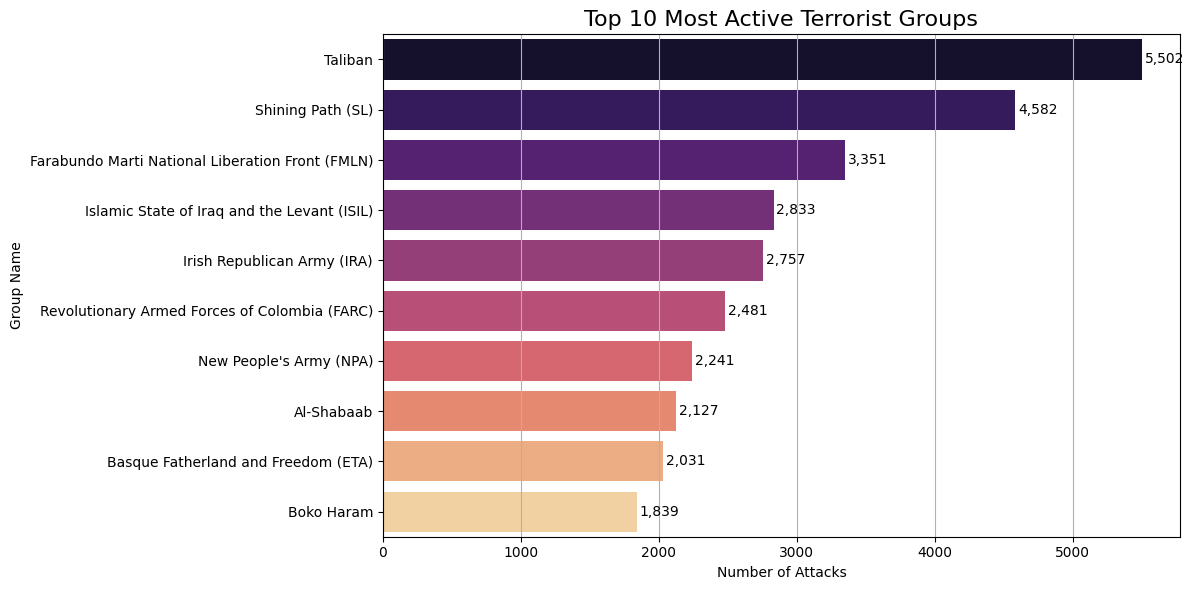

In [104]:
# Exclude 'Unknown' entries
top_groups = df[df['gname'] != 'Unknown']['gname'].value_counts().head(10)

# Create a DataFrame
top_groups_df = top_groups.reset_index()
top_groups_df.columns = ['Group', 'Attacks']

# Barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_groups_df, x='Attacks', y='Group', hue = 'Group', palette='magma', legend = False)

# Add values
for i, value in enumerate(top_groups_df['Attacks']):
    ax.text(value + 20, i, f'{int(value):,}', va='center', fontsize=10)

plt.title("Top 10 Most Active Terrorist Groups", fontsize=16)
plt.xlabel("Number of Attacks")
plt.ylabel("Group Name")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

#Taliban and shining Path are the most active terrorist groups, has been concluded.

In [112]:
top_group = top_groups_df['Group'][:1]

for group in top_group:
    print(f"\n📌 Group: {group}")
    group_df = df[df['gname'] == group]
    
    attack_types = group_df['attacktype1_txt'].value_counts().head(3)
    regions = group_df['region_txt'].value_counts().head(3)
    
    print(f"  - Total Attacks: {len(group_df)}")
    print(f"  - Top Attack Types:\n{attack_types}")
    print(f"  - Primary Regions of Operation:\n{regions}")


📌 Group: Taliban
  - Total Attacks: 5502
  - Top Attack Types:
attacktype1_txt
Bombing/Explosion              2323
Armed Assault                  1573
Hostage Taking (Kidnapping)     529
Name: count, dtype: int64
  - Primary Regions of Operation:
region_txt
South Asia      5501
Central Asia       1
Name: count, dtype: int64


#Above query clearly shows the Taliban Terror Group's all information which is the most active terror group in the world.

In [113]:
df['casualties'] = df['nkill'].fillna(0) + df['nwound'].fillna(0)

#created the column of name 'Casualties' which is the sum of nkill and nwound.

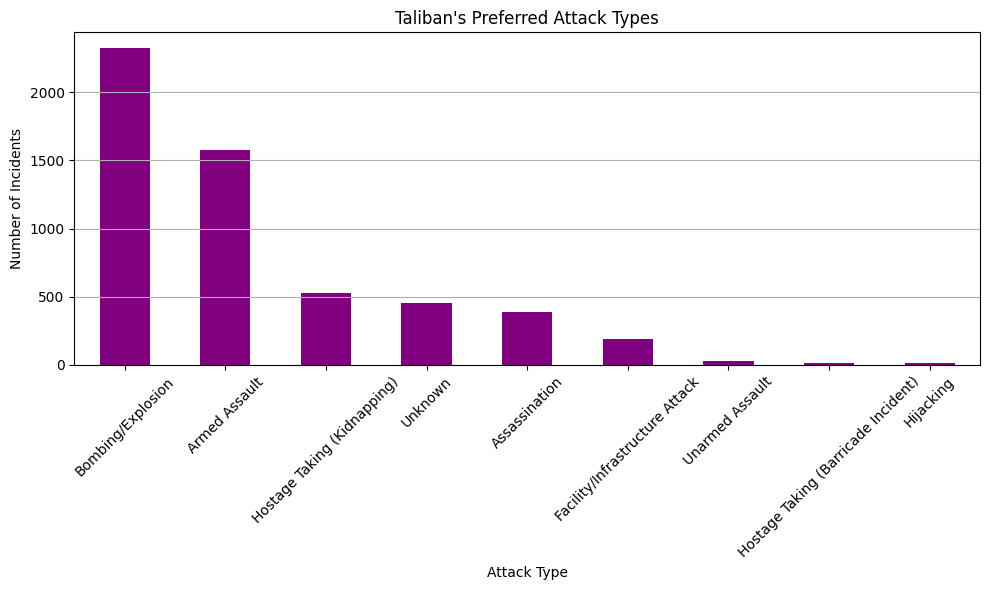

In [126]:
taliban_attacks = df[df['gname'] == 'Taliban']['attacktype1_txt'].value_counts()

taliban_attacks.plot(kind='bar', color='purple', figsize=(10, 6))
plt.title("Taliban's Preferred Attack Types")
plt.xlabel("Attack Type")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

In [116]:
# Get top 10 highest casualty incidents
top_attacks = df.sort_values(by='casualties', ascending=False).head(10)

# Select relevant columns for display
top_attacks_summary = top_attacks[[
    'iyear', 'country_txt', 'region_txt', 'city',
    'gname', 'attacktype1_txt', 'target1',
    'nkill', 'nwound', 'casualties'
]]

top_attacks_summary.reset_index(drop=True, inplace=True)
top_attacks_summary


,iyear,country_txt,region_txt,city,gname,attacktype1_txt,target1,nkill,nwound,casualties
0,1995,Japan,East Asia,Tokyo,Aum Shinri Kyo,Unarmed Assault,Subway system,13.0,5500.0,5513.0
1,1998,Kenya,Sub-Saharan Africa,Nairobi,Al-Qaida,Bombing/Explosion,"United States Embassy in Nairobi, Kenya",224.0,4000.0,4224.0
2,2014,Iraq,Middle East & North Africa,Tikrit,Islamic State of Iraq and the Levant (ISIL),Hostage Taking (Kidnapping),Soldiers,1500.0,0.0,1500.0
3,2001,United States,North America,New York City,Al-Qaida,Hijacking,Passengers and crew members on United Airlines...,1381.5,0.0,1381.5
4,2001,United States,North America,New York City,Al-Qaida,Hijacking,Passengers and crew members on American Airlin...,1381.5,0.0,1381.5
5,1993,Sri Lanka,South Asia,Kilinochchi District,Liberation Tigers of Tamil Eelam (LTTE),Hostage Taking (Barricade Incident),Pooneryn Military Base in Sri Lanka,970.0,400.0,1370.0
6,1996,Sri Lanka,South Asia,Colombo,Liberation Tigers of Tamil Eelam (LTTE),Bombing/Explosion,Bank,90.0,1272.0,1362.0
7,1994,Rwanda,Sub-Saharan Africa,Gikoro,Hutus,Armed Assault,Group of Tutsi Refugees inside Catholic Church,1180.0,0.0,1180.0
8,2008,Chad,Sub-Saharan Africa,N'Djamena,Rebels,Armed Assault,President Idriss Deby,160.0,1001.0,1161.0
9,2004,Russia,Eastern Europe,Beslan,Riyadus-Salikhin Reconnaissance and Sabotage B...,Armed Assault,"School Number One (SNO) in Beslan, Russia",344.0,727.0,1071.0


#Top 10 casualty incidents information 

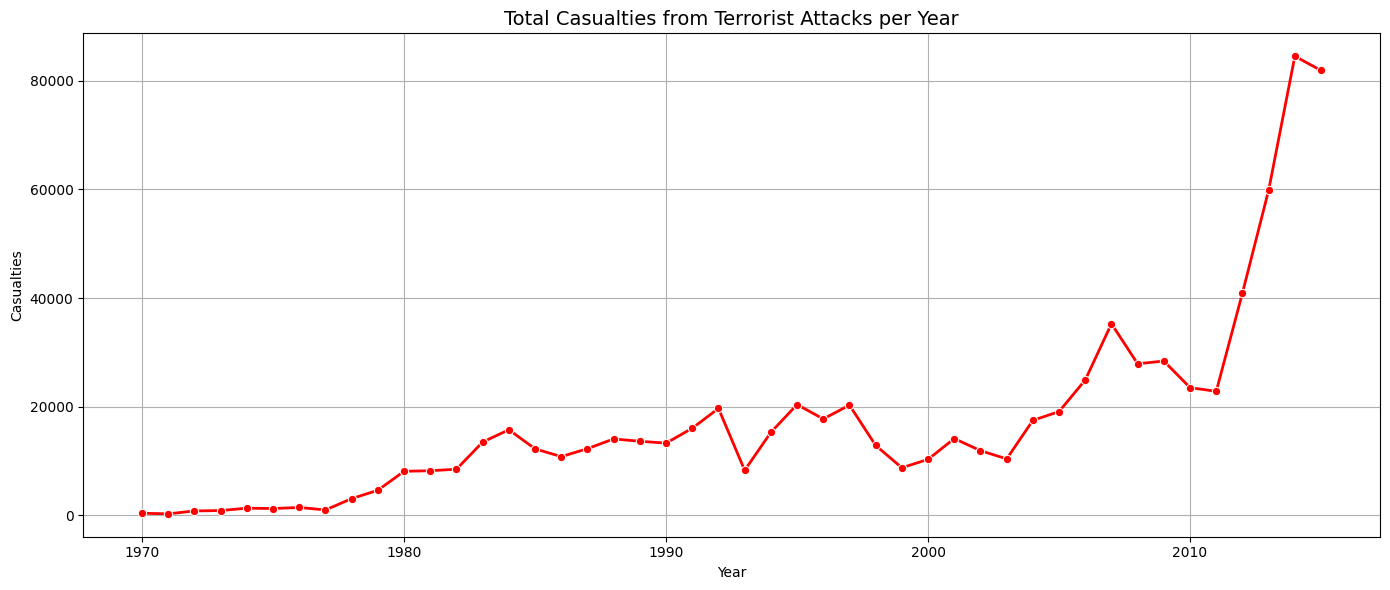

In [117]:
casualty_by_year = df.groupby('iyear')['casualties'].sum()

plt.figure(figsize=(14,6))
sns.lineplot(x=casualty_by_year.index, y=casualty_by_year.values, marker='o', linewidth=2, color='red')
plt.title("Total Casualties from Terrorist Attacks per Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Casualties")
plt.grid(True)
plt.tight_layout()
plt.show()

#avove chart shows that after 2011, Casualty also happened in a large numbers.

In [127]:
df['nkill'] = df['nkill'].fillna(0)
df['nwound'] = df['nwound'].fillna(0)

df['casualties'] = df['nkill'] + df['nwound']

# Group by country and sum the casualties
casualties_by_country = df.groupby('country_txt')['casualties'].sum().sort_values(ascending=False).head(10)

# Display the result
casualties_by_country

country_txt
Iraq           173906.0
Pakistan        59745.0
Afghanistan     58654.0
India           47655.8
Sri Lanka       32498.0
Nigeria         26644.0
Colombia        25351.0
Philippines     20891.0
Algeria         20201.0
Syria           20153.0
Name: casualties, dtype: float64

#above information stated that Iraq has faced maximum casualties(173906) then Pakistan, Afganistan, India so on.